n-MOSFET Transistor
===================

This example shows how to simulate the characteristic curves of an nmos
transistor.


In [ ]:


import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *


libraries_path = 'SpiceLib'
spice_library = SpiceLibrary(libraries_path)




We define a basic circuit to drive an nmos transistor using two voltage
sources. The nmos transistor demonstrated in this example is a low-level
device description.


In [ ]:

circuit = Circuit('NMOS Transistor')
circuit.include(spice_library['ptm65nm_nmos'])

# Define the DC supply voltage value
Vdd = 1.1

# Instanciate circuit elements
Vgate = circuit.V('gate', 'gatenode', circuit.gnd, 0@u_V)
Vdrain = circuit.V('drain', 'vdd', circuit.gnd, u_V(Vdd))
# M <name> <drain node> <gate node> <source node> <bulk/substrate node>
circuit.MOSFET(1, 'vdd', 'gatenode', circuit.gnd, circuit.gnd, model='ptm65nm_nmos')



Mosfet M1

We plot the characteristics $Id = f(Vgs)$ using a DC sweep simulation.


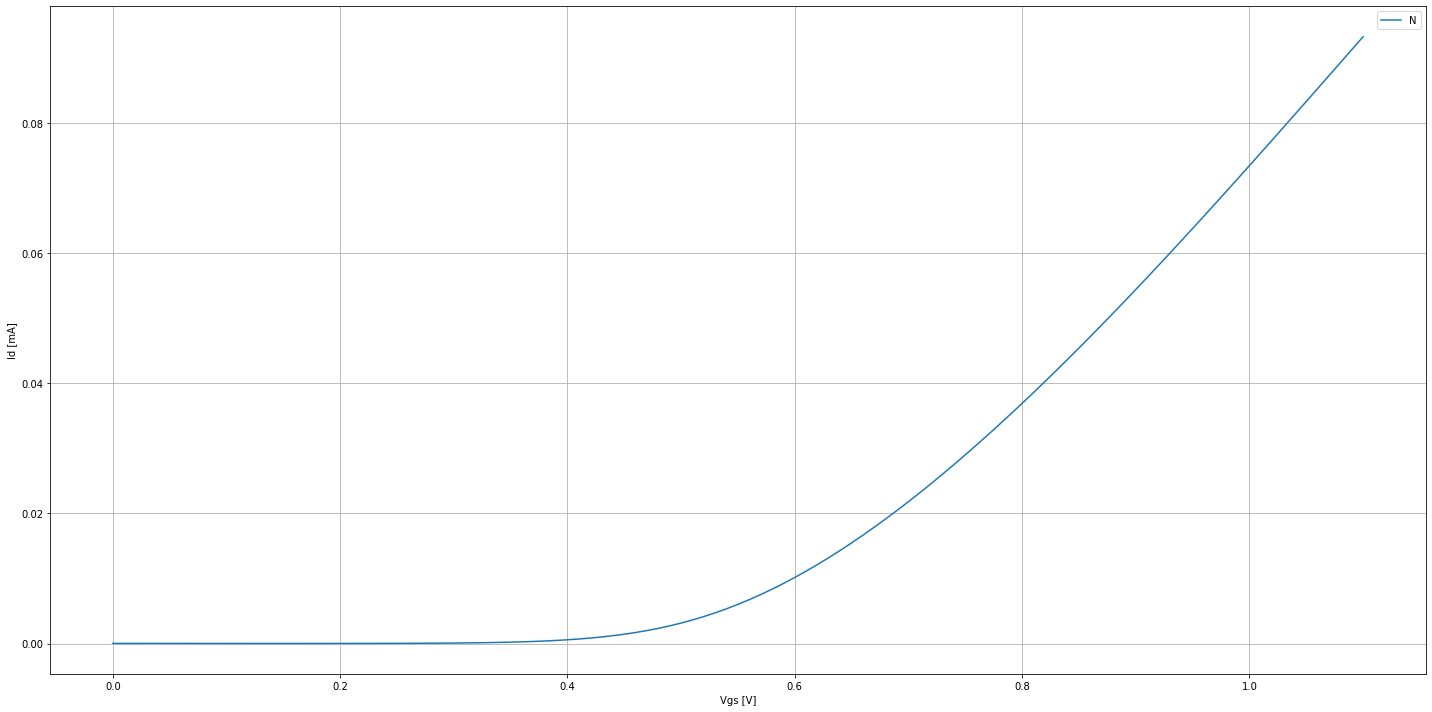

In [ ]:

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.dc(Vgate=slice(0, Vdd, .01))

figure, ax = plt.subplots(figsize=(20, 10))

ax.plot(analysis['gatenode'], u_mA(-analysis.Vdrain))
ax.legend('NMOS characteristic')
ax.grid()
ax.set_xlabel('Vgs [V]')
ax.set_ylabel('Id [mA]')

plt.tight_layout()

